### Bibliotecas

In [2]:
import pandas as pd

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

### Iniciando uma instância no Google Chrome

In [14]:
# A classe Service é usada para iniciar uma instância do Chrome WebDriver
service = Service()

# webdriver.ChromeOptions é usada para definir a preferência para o browser do Chrome
options = webdriver.ChromeOptions()

# Inicia-se a instância do Chrome WebDriver com as definidas 'options' e 'service'
driver = webdriver.Chrome(service=service, options=options)

url = "https://www.gov.br/pf/pt-br/search?origem=form&SearchableText=licitacao"

driver.get(url)

### Encontrar Elementos do HTML
- find_element(By.ID, 'id')
- find_element(By.NAME, 'name')
- find_element(By.XPATH, 'xpath')
- find_element(By.LINK_TEXT, 'link text')
- find_element(By.PARTIAL_LINK_TEXT, 'partial link text')
- find_element(By.TAG_NAME, 'tag name')
- find_element(By.CLASS_NAME, 'class name')
- find_element(By.CSS_SELECTOR, 'css selector')

In [31]:
elementos = driver.find_elements(By.CSS_SELECTOR, 'span.titulo a')
print(elementos)

[<selenium.webdriver.remote.webelement.WebElement (session="25beacadc9b81df022b9b2d9cb8b3d8b", element="f.A678B909822C47EA2DA281E8EA6C8583.d.87DB4FDA214C8E9C803CCE242BD30409.e.454")>, <selenium.webdriver.remote.webelement.WebElement (session="25beacadc9b81df022b9b2d9cb8b3d8b", element="f.A678B909822C47EA2DA281E8EA6C8583.d.87DB4FDA214C8E9C803CCE242BD30409.e.455")>, <selenium.webdriver.remote.webelement.WebElement (session="25beacadc9b81df022b9b2d9cb8b3d8b", element="f.A678B909822C47EA2DA281E8EA6C8583.d.87DB4FDA214C8E9C803CCE242BD30409.e.456")>, <selenium.webdriver.remote.webelement.WebElement (session="25beacadc9b81df022b9b2d9cb8b3d8b", element="f.A678B909822C47EA2DA281E8EA6C8583.d.87DB4FDA214C8E9C803CCE242BD30409.e.457")>, <selenium.webdriver.remote.webelement.WebElement (session="25beacadc9b81df022b9b2d9cb8b3d8b", element="f.A678B909822C47EA2DA281E8EA6C8583.d.87DB4FDA214C8E9C803CCE242BD30409.e.458")>, <selenium.webdriver.remote.webelement.WebElement (session="25beacadc9b81df022b9b2d9c

In [33]:
len(elementos)

30

In [32]:
for elemento in elementos:
    print('Texto da notícia: ', elemento.text)
    print("Link: ", elemento.get_attribute('href'))
    print('##################################')

Texto da notícia:  PF e CGU deflagram operação de combate a crimes contra à administração pública e de lavagem de capitais em Pernambuco
Link:  https://www.gov.br/pf/pt-br/assuntos/noticias/2025/06/pf-e-cgu-deflagram-operacao-de-combate-a-crimes-contra-a-administracao-publica-e-de-lavagem-de-capitais-em-pernambuco
##################################
Texto da notícia:  PF desarticula esquema criminoso de desvio de verbas da saúde e da educação no interior do Piauí
Link:  https://www.gov.br/pf/pt-br/assuntos/noticias/2025/06/pf-desarticula-esquema-criminoso-de-desvio-de-verbas-da-saude-e-da-educacao-no-interior-do-piaui
##################################
Texto da notícia:  PF e PMSC prendem uruguaio procurado pela Interpol e apreendem droga, veículos e dinheiro em espécie
Link:  https://www.gov.br/pf/pt-br/assuntos/noticias/2025/05/pf-e-pmsc-prendem-cidadao-uruguaio-procurado-pela-interpol-e-apreende-droga-veiculos-e-dinheiro-em-especie
##################################
Texto da notícia:

In [ ]:
# //*[@id="search-results"]/div[4]/div[2]/span[2]/ul[2]/li[4]/a[1]

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.service import Service
import pandas as pd
from openai import OpenAI
from tqdm import tqdm
import time
from dotenv import load_dotenv
import os

In [4]:

def iniciar_driver():
    service = Service()
    # webdriver.ChromeOptions é usada para definir a preferência para o browser do Chrome
    options = webdriver.ChromeOptions()

    # Inicia-se a instância do Chrome WebDriver com as definidas 'options' e 'service'
    driver = webdriver.Chrome(service=service, options=options)
    return driver

In [5]:

termo_busca = 'licitacao'

def coletar_todas_paginas():
    driver = iniciar_driver()
    url = f"https://www.gov.br/pf/pt-br/search?SearchableText={termo_busca}"
    driver.get(url)
    time.sleep(2)

    todas_noticias = []
    pagina = 1

    while True:
        print(f"\n🔎 Coletando dados da página {pagina}")

        # Pega os títulos
        noticias = driver.find_elements(By.CSS_SELECTOR, "span.titulo a")
        for noticia in noticias:
            titulo = noticia.text.strip()
            link = noticia.get_attribute("href")
            todas_noticias.append({"Título": titulo, "Link": link})
            print(f"✔ {titulo}")

        # Tenta localizar o botão "Próximo »"
        try:
            proximo = driver.find_element(By.XPATH, "//a[@class='proximo' and contains(text(), 'Próximo')]")
            time.sleep(1)
            driver.execute_script("arguments[0].scrollIntoView();", proximo)
            time.sleep(1)

            # Força o clique via JavaScript
            driver.execute_script("arguments[0].click();", proximo)

            pagina += 1
            time.sleep(2)
        except NoSuchElementException:
                print("🚫 Fim da paginação.")
                break

    driver.quit()
    return todas_noticias



In [ ]:
dados = coletar_todas_paginas()

In [ ]:

pd.DataFrame(dados).to_csv("noticias_licitacao_pf.csv", index=False, encoding="utf-8")
print(f"\n✅ Total de notícias coletadas: {len(dados)}")


✅ Total de notícias coletadas: 830


### Extração dos textos dentro da notícia

In [24]:
caminho_arquivo = 'noticias_licitacao_pf.csv'

dados_arq = pd.read_csv(caminho_arquivo, )

print(dados_arq['Link'])


0      https://www.gov.br/pf/pt-br/assuntos/noticias/...
1      https://www.gov.br/pf/pt-br/assuntos/noticias/...
2      https://www.gov.br/pf/pt-br/assuntos/noticias/...
3      https://www.gov.br/pf/pt-br/assuntos/noticias/...
4      https://www.gov.br/pf/pt-br/assuntos/noticias/...
                             ...                        
825    https://www.gov.br/pf/pt-br/assuntos/noticias/...
826    https://www.gov.br/pf/pt-br/assuntos/noticias/...
827    https://www.gov.br/pf/pt-br/assuntos/noticias/...
828    https://www.gov.br/pf/pt-br/assuntos/noticias/...
829    https://www.gov.br/pf/pt-br/assuntos/noticias/...
Name: Link, Length: 830, dtype: object


In [ ]:
def extrair_texto_principal_noticia():
    driver = iniciar_driver()
    dados_noticia = []

    for i in range(0 , len(dados_arq['Link'])):
        print(f"✅ Coletando dados da notícia {i + 1} de {len(dados_arq['Link'])}...")
        url = dados_arq['Link'][i]
        driver.get(url)
        time.sleep(0.3)
        data_publicacao = driver.find_element(By.CLASS_NAME, "value").text.strip()
        titulo = driver.find_element(By.CLASS_NAME, 'documentFirstHeading').text.strip()
        descricao = driver.find_element(By.CLASS_NAME, "documentDescription").text.strip()
        texto_principal = driver.find_element(By.ID, "content-core").text.strip()
        dados_noticia.append({
            "Data publicação:": data_publicacao,
            "Título": titulo ,
            "Descrição": descricao ,
            "Texto Principal": texto_principal,
            'URL': url
            })

    driver.quit()
    return dados_noticia

In [57]:
resultado = extrair_texto_principal_noticia()

pd.DataFrame(resultado).to_csv("dados_noticias.csv", index=False, encoding="utf-8")
print(f"\n✅ Total de notícias coletadas: {len(resultado)}")

✅ Coletando dados da notícia 1 de 830...
✅ Coletando dados da notícia 2 de 830...
✅ Coletando dados da notícia 3 de 830...
✅ Coletando dados da notícia 4 de 830...
✅ Coletando dados da notícia 5 de 830...
✅ Coletando dados da notícia 6 de 830...
✅ Coletando dados da notícia 7 de 830...
✅ Coletando dados da notícia 8 de 830...
✅ Coletando dados da notícia 9 de 830...
✅ Coletando dados da notícia 10 de 830...
✅ Coletando dados da notícia 11 de 830...
✅ Coletando dados da notícia 12 de 830...
✅ Coletando dados da notícia 13 de 830...
✅ Coletando dados da notícia 14 de 830...
✅ Coletando dados da notícia 15 de 830...
✅ Coletando dados da notícia 16 de 830...
✅ Coletando dados da notícia 17 de 830...
✅ Coletando dados da notícia 18 de 830...
✅ Coletando dados da notícia 19 de 830...
✅ Coletando dados da notícia 20 de 830...
✅ Coletando dados da notícia 21 de 830...
✅ Coletando dados da notícia 22 de 830...
✅ Coletando dados da notícia 23 de 830...
✅ Coletando dados da notícia 24 de 830...
✅

In [7]:
#Carregando a chave de API
load_dotenv()
api_key = os.getenv('OPEN_API_KEY')
client =OpenAI(api_key=api_key)

In [15]:
# FUNÇÃO PARA CLASSIFICAR A NOTÍCIA
def classificar_noticia(titulo, descricao, texto):
    prompt = f"""
Você é um especialista em classificar notícias. Você receberá várias notícias e cada uma terá um título, uma descrição e um texto principal.
A grande maioria das notícias são sobre fraudes em licitações e contratos publicadas encontradas no site da polícia federal brasileira.
Sua função é classificar a notícia tendo como base campos: título, descrição e texto principal. A classificação deve retornar somente os termos abaixo.

- obra - para fraudes em licitações na área da construção civil, como prédios, pontes ou outras.
- saúde - para fraudes em licitações envolvendo a área da saúde como compras de medicamentos superfaturados, compra de equipamentos médicos e outros.
- escola - para fraude envolvendo o setor de educação como superfaturamento na compra de merendas, transporte escolar ou outras áreas do setor de educação.
- serviços de terceiros - para fraudes relacionadas a contração de servicos terceirizados, onde há indícios de superfaturamento ou irregularidades, dentre outras.
- TI - para fraude na área de tecnologia, como compra de computadores, equipamentos de informática em geral, desenvolvimento de softwares e programas, ou prestação de serviço na área de TI e outras.
- outras - para fraude de licitações que não se encaixam nas áreas descritas anteriormente.
- não fraude - para notícias que não são fraudes em licitações, são outras investigações ou atuação da polícia federal que não se encaixa em uma fraude de licitação.

Importante levar em consideração que nem todas as notícias serão de fraude em licitação.

Título: {titulo}
Descrição: {descricao}
Texto: {texto}

Retorne **apenas** o nome da categoria apropriada.
"""
    try:
        resposta = client.chat.completions.create(
            model="gpt-4o",  # ou "gpt-3.5-turbo"
            messages=[
                {"role": "system", "content": "Você é um especialista muito prestativo e cuidadoso que classifica notícias sobre fraudes em licitações e outros tipos de crimes."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.0,
        )
        categoria = resposta.choices[0].message.content.strip().lower()
        return categoria
    except Exception as e:
        print(f"Erro na API: {e}")
        return "erro"

In [ ]:
"""Outro ponto importante é que algumas fraudes em licitação podem ser classificadas
por mais de um dos termos descritos anteriormente. Por exemplo, a fraude de licitação se deu na construção de uma hospital, isso envolve o termo obra e saúde, nestes
casos classifique a fraude com os dois ou mais termos sugeridos."""

In [16]:
# CARREGAR O CSV
df = pd.read_csv("dados_noticias.csv")

In [17]:
df.head(5)

,Data publicação:,Título,Descrição,Texto Principal,URL
0,05/06/2025 09h22,PF e CGU deflagram operação de combate a crime...,Operação objetiva reprimir a atuação de uma or...,"Recife/PE. A Polícia Federal em Pernambuco, co...",https://www.gov.br/pf/pt-br/assuntos/noticias/...
1,03/06/2025 07h36,PF desarticula esquema criminoso de desvio de ...,Três mandados de busca e apreensão são cumprid...,"Teresina/PI. A Polícia Federal deflagrou, nest...",https://www.gov.br/pf/pt-br/assuntos/noticias/...
2,30/05/2025 11h43,PF e PMSC prendem uruguaio procurado pela Inte...,O foragido possuía mandado de prisão preventiv...,"Florianópolis/SC. A Polícia Federal, em ação c...",https://www.gov.br/pf/pt-br/assuntos/noticias/...
3,21/05/2025 10h33,PF deflagra operação contra fraudes em licitaç...,Foram cumpridos dois mandados de busca e apree...,"Manaus/AM. A Polícia Federal cumpriu, na manhã...",https://www.gov.br/pf/pt-br/assuntos/noticias/...
4,21/05/2025 08h18,"PF, CGU e Receita Federal deflagram operação c...",Ação conjunta com a CGU e a Receita Federal ap...,"Campo Grande/MS. A Polícia Federal, em ação co...",https://www.gov.br/pf/pt-br/assuntos/noticias/...


In [18]:
df.tail(10)

,Data publicação:,Título,Descrição,Texto Principal,URL
820,30/03/2019 21h00,PF deflagra Operação Pescaria II para combater...,Esta segunda fase da operação conta com a part...,"Caruaru/PE - A Polícia Federal, com apoio da C...",https://www.gov.br/pf/pt-br/assuntos/noticias/...
821,30/03/2019 21h00,PF desmonta grupo criminoso responsável por fr...,Operação Baldroca investiga fraudes em certame...,"Maceió/AL – A Polícia Federal deflagrou, na ma...",https://www.gov.br/pf/pt-br/assuntos/noticias/...
822,30/03/2019 21h00,Operação Tiro combate desvio de recursos públi...,Cerca de 40 policiais federais e sete servidor...,Natal/RN – A Polícia Federal em conjunto com a...,https://www.gov.br/pf/pt-br/assuntos/noticias/...
823,30/03/2019 21h00,Polícia Federal prende donos de loja virtual d...,Casal vendia os produtos estrangeiros sem comp...,Maringá/PR – A Polícia Federal prendeu em flag...,https://www.gov.br/pf/pt-br/assuntos/noticias/...
824,30/03/2019 21h00,Polícia Federal deflagra Operação Cooper para ...,As mercadorias importadas clandestinamente era...,Roraima/RR - A Polícia Federal em Roraima defl...,https://www.gov.br/pf/pt-br/assuntos/noticias/...
825,27/02/2019 21h00,Operação Fantoche investiga esquema de fraudes...,Mais de 200 policiais federais participaram da...,Recife/PE – A Polícia Federal deflagrou nesta ...,https://www.gov.br/pf/pt-br/assuntos/noticias/...
826,27/02/2019 21h00,PF combate fraude a licitação e desvio de recu...,Operação Trapaça investiga organização crimino...,Cárceres/MT - A Polícia Federal deflagrou nest...,https://www.gov.br/pf/pt-br/assuntos/noticias/...
827,27/02/2019 21h00,PF investiga servidor por suposto esquema de p...,Operação Tu Quoque Brute combate corrupção e p...,Natal/RN – A Polícia Federal deflagrou hoje (2...,https://www.gov.br/pf/pt-br/assuntos/noticias/...
828,29/11/2011 21h00,PF investiga irregularidades em campanha eleit...,Operação Pão e Circo apura suposto esquema rel...,Macapá/AP - A Polícia Federal deflagrou nesta ...,https://www.gov.br/pf/pt-br/assuntos/noticias/...
829,29/11/2011 21h00,Polícia Federal deflagra operação para combate...,Casas lotéricas ligadas a políticos eram usada...,"Recife/PE - A Polícia Federal, em parceria com...",https://www.gov.br/pf/pt-br/assuntos/noticias/...


In [19]:

# CLASSIFICAR CADA LINHA
categorias = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    categoria = classificar_noticia(row["Título"], row["Descrição"], row["Texto Principal"])
    categorias.append(categoria)
    time.sleep(1)  # Evita atingir o limite de taxa da API

# ADICIONAR CATEGORIA AO DATAFRAME
df["categoria"] = categorias

# SALVAR RESULTADO
df.to_csv("noticias_classificadas.csv", index=False)

print("Classificação concluída. Arquivo salvo como 'noticias_classificadas.csv'.")


100%|██████████| 830/830 [24:17<00:00,  1.76s/it]

Classificação concluída. Arquivo salvo como 'noticias_classificadas.csv'.


### Retira as linhas da categoria 'não fraude'

In [60]:
df = pd.read_csv("noticias_classificadas.csv")
df_filtrado = df[df['categoria'] != 'não fraude']
df_filtrado.to_csv('FINAL.csv', index=False)

### Função para contar a quantidade de uma mesma categoria

In [61]:
freq_palavras = {}

def contar_palavras(lista_palavras):
    for palavra in lista_palavras:
        palavra = palavra.lower().strip()  # Normaliza a palavra
        if palavra in freq_palavras:
            freq_palavras[palavra] += 1
        else:
            freq_palavras[palavra] = 1
    return freq_palavras

In [62]:
df = pd.read_csv("FINAL.csv")

categorias = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    categoria = row["categoria"]
    categorias.append(categoria)
    print(categoria)

100%|██████████| 609/609 [00:00<00:00, 46971.89it/s]

serviços de terceiros
saúde
escola
escola
escola
escola
saúde
escola
saúde
outras
outras
saúde
outras
escola
outras
obra
saúde
outras
escola
escola
obra
saúde
saúde
outras
saúde
escola
serviços de terceiros
saúde
outras
serviços de terceiros
serviços de terceiros
saúde
obra
obra
outras
saúde
obra
outras
escola
obra
outras
obra
saúde
saúde
outras
outras
saúde
obra
serviços de terceiros
saúde
saúde
saúde
escola
serviços de terceiros
serviços de terceiros
escola
outras
escola
outras
saúde
saúde
obra
outras
obra
saúde
obra
saúde
outras
outras
serviços de terceiros
outras
obra
escola
escola
saúde
saúde
escola
saúde
serviços de terceiros
obra
escola
saúde
escola
saúde
saúde
escola
obra
outras
outras
serviços de terceiros
outras
saúde
saúde
outras
serviços de terceiros
saúde
saúde
obra
obra
saúde
saúde
saúde
escola
saúde
escola
saúde
escola
saúde
escola
outras
outras
outras
obra
serviços de terceiros
outras
saúde
saúde
saúde
saúde
saúde
escola
ti
outras
outras
saúde
saúde
escola
outras
outras

In [63]:
resultados = contar_palavras(categorias)
print(resultados)

{'serviços de terceiros': 39, 'saúde': 257, 'escola': 103, 'outras': 110, 'obra': 84, 'ti': 16}


In [64]:
soma = 0
for valor in resultados.values():
    soma += valor

print(f"Valor total das categorias: {soma}")


Valor total das categorias: 609


In [65]:
import matplotlib.pyplot as plt

/tmp/ipykernel_25438/4292770110.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cores = plt.cm.get_cmap('tab10', len(categorias)).colors


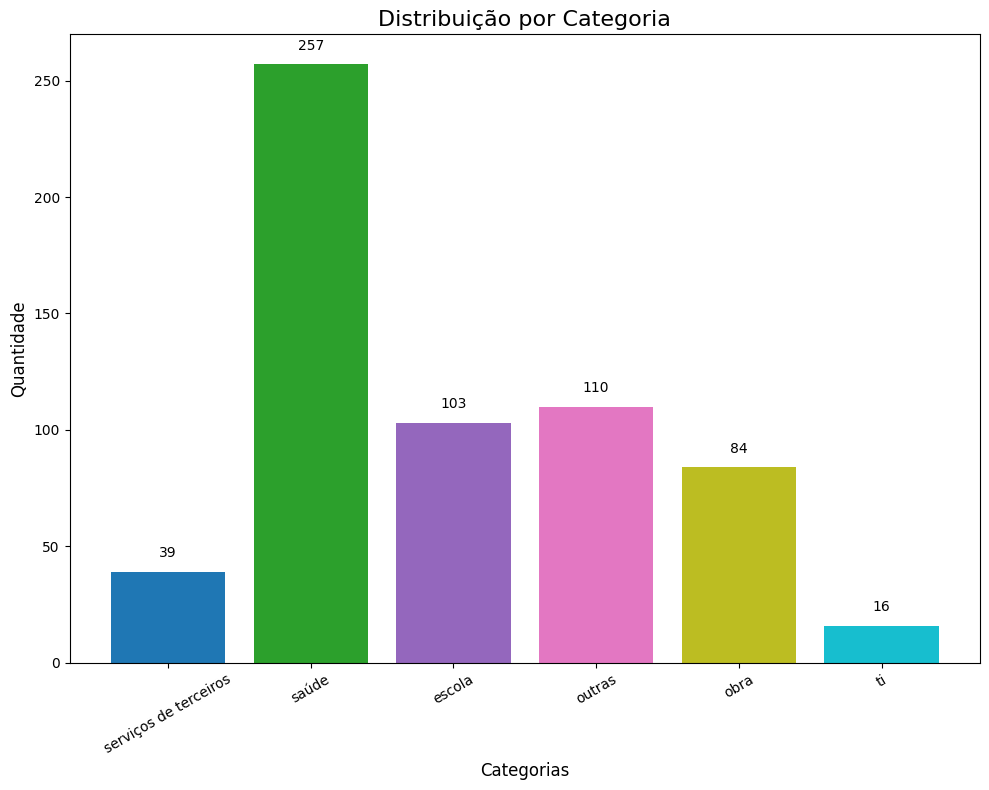

In [66]:
# Separar chaves e valores
categorias = list(resultados.keys())
valores = list(resultados.values())

# Gerar cores diferentes para cada barra
cores = plt.cm.get_cmap('tab10', len(categorias)).colors

# Criar gráfico
plt.figure(figsize=(10, 8))
barras = plt.bar(categorias, valores, color=cores)

# Adicionar título e rótulos
plt.title('Distribuição por Categoria', fontsize=16)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=30)

# Adicionar rótulo de valor sobre cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 5,
             f'{int(altura)}', ha='center', va='bottom')

# Exibir gráfico
plt.tight_layout()
plt.savefig("grafico_categorias.png", dpi=300)
plt.show()
